# 4. Data Transformation - 연봉 데이터 다루기
---
## 4-1. 학습목표: 데이터 변환의 고급 기술을 습득합니다.
1. 데이터를 다양한 방법으로 합치고 변환할 수 있다.
2. 데이터의 스케일을 변환할 수 있다.
3. 카테고리형 데이터를 숫자형태로 변환할 수 있다.
4. 데이터의 차원축소를 할 수 있다.
---
## 4-2. Data merge(데이터 병합)
1. merge와 join의 특징에 대해 더 알아 봅시다.
2. pandas에서는 merge 함수를 사용하여 SQL 스타일의 조인을 수행할 수 있습니다.
---

In [1]:
import pandas as pd
import numpy as np

# 병합 실습용 데이터프레임 생성

df_a = pd.DataFrame({'key': ['a', 'b', 'c', 'd', 'e'], 'num_a': [1, 2, 3, 4, 5]})
df_b = pd.DataFrame({'key': ['a', 'b', 'd', 'f', 'g'], 'num_b': [11, 15, 35, 45, 55]})
df_c = pd.DataFrame({'key': ['f', 'g', 'h', 'i', 'j'], 'num_a': [6, 7, 8, 9, 0]})

### 4-2-1.concat() 함수
- pd.concat(axis = int) = 데이터를 int 방향으로 결합; axis 생략시 axis = 0
- 병합할 데이터프레임에 서로 다른 컬럼명이 있을 경우, 컬럼 추가
- 결합방향의 인덱스나 컬럼은 재정렬되지 않고 덧붙여짐에 주목

In [2]:
# axis = 0 혹은 생략의 경우 인덱스는 재정렬되지 않고 이어붙여짐에 주목!
pd.concat([df_a, df_b, df_c])

,key,num_a,num_b
0,a,1.0,NaN
1,b,2.0,NaN
2,c,3.0,NaN
3,d,4.0,NaN
4,e,5.0,NaN
0,a,NaN,11.0
1,b,NaN,15.0
2,d,NaN,35.0
3,f,NaN,45.0
4,g,NaN,55.0


In [3]:
# axis = 1인 경우 컬럼 역시 재정렬이나 병합 없이 이어붙여짐
pd.concat([df_a, df_b, df_c], axis = 1)

,key,num_a,key,num_b,key,num_a
0,a,1,a,11,f,6
1,b,2,b,15,g,7
2,c,3,d,35,h,8
3,d,4,f,45,i,9
4,e,5,g,55,j,0


### 4-2-2.merge() 함수
- dataframe1.merge(dataframe2) = dataframe1과 dataframe2를 병합
- how 인자를 통해 병합방식을 설정 가능
 - inner join: 머지 대상의 공통된 키만을 추려내 반환
 - left join: "왼쪽" df의 모든 키와 "오른쪽" df의 공통된 키를 반환
 - right join: "오른쪽" df의 모든 키와 "왼쪽" df의 공통된 키를 반환
 - outer join: 머지 대상의 모든 키를 na 포함하여 반환
- on 인자를 통해 병합의 기준이 되는 컬럼을 설정 가능:<br>미설정시 이름이 같은 컬럼들이 기준이 됨

In [4]:
# on 인자를 생략하여, 이름이 같은 "key" 컬럼이 기준이 됨

df_a.merge(df_b, how = 'outer')

,key,num_a,num_b
0,a,1.0,11.0
1,b,2.0,15.0
2,c,3.0,NaN
3,d,4.0,35.0
4,e,5.0,NaN
5,f,NaN,45.0
6,g,NaN,55.0


In [5]:
# 이름이 같은 컬럼이 복수일 경우, 일부만 키 컬럼으로 설정했을 때와 비교

df_a.merge(df_c, how = 'outer') # num_a 컬럼 역시 키 컬럼이며 병합의 대상이 아님

,key,num_a
0,a,1
1,b,2
2,c,3
3,d,4
4,e,5
5,f,6
6,g,7
7,h,8
8,i,9
9,j,0


In [6]:
df_a.merge(df_c, on = 'key', how = 'outer') # num_a 컬럼 역시 병합의 대상이 됨

,key,num_a_x,num_a_y
0,a,1.0,NaN
1,b,2.0,NaN
2,c,3.0,NaN
3,d,4.0,NaN
4,e,5.0,NaN
5,f,NaN,6.0
6,g,NaN,7.0
7,h,NaN,8.0
8,i,NaN,9.0
9,j,NaN,0.0


In [7]:
# "왼쪽"과 "오른쪽"의 df에 공통된 컬럼명이 없을 경우:
# 실습을 위해 df_b의 key 컬럼을 id로 변경한 df_d를 생성

df_d = df_b.rename(columns = {'key': 'id'})

In [8]:
# left_on과 right_on을 각각 지정

df_a.merge(df_d, left_on = "key", right_on = "id", how = "outer")

,key,num_a,id,num_b
0,a,1.0,a,11.0
1,b,2.0,b,15.0
2,c,3.0,NaN,NaN
3,d,4.0,d,35.0
4,e,5.0,NaN,NaN
5,NaN,NaN,f,45.0
6,NaN,NaN,g,55.0


### 4-2-3.join() 함수
- 구문은 merge와 비슷하나 결과는 concat과 비슷
 - 동일한 컬럼명이 있을 경우 에러 발생: 에러 처리 위해 lsuffix, rsuffix 지정 가능
 - 동일한 컬럼명의 내용을 기준으로 병합하고 싶다면 df.set_index('컬럼명')로 처리 필요

In [9]:
# "왼쪽"과 "오른쪽" df에 각각 접미사를 붙여 조인

df_a.join(df_b, lsuffix = "_a", rsuffix = "_b") # how 인자 설정 가능

,key_a,num_a,key_b,num_b
0,a,1,a,11
1,b,2,b,15
2,c,3,d,35
3,d,4,f,45
4,e,5,g,55


In [10]:
# 공통된 컬럼명을 가진 key를 인덱스로 처리하여 조인

df_a_join = df_a.set_index('key')
df_b_join = df_b.set_index('key')

df_a_join.join(df_b_join) # how 인자 미설정시 left join이 기본값

,num_a,num_b
key,,
a,1,11.0
b,2,15.0
c,3,NaN
d,4,35.0
e,5,NaN


### 4-2-4. 연습 데이터를 활용한 예제

In [11]:
#연습용 데이터 호출

salary_1 = pd.read_csv('~/data/salary_1.csv')
salary_2 = pd.read_csv('~/data/salary_2.csv')

In [12]:
# 데이터 확인

salary_1

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0
...,...,...,...,...,...,...,...,...,...
3994,44.0,Male,3,Data Scientist,15.0,150000,USA,African American,0
3995,28.0,Male,1,Software Developer,3.0,60000,China,Korean,0
3996,31.0,Male,1,Software Engineer,5.0,80000,UK,Mixed,0
3997,27.0,Female,2,Marketing Manager,3.0,60000,UK,White,0


In [13]:
salary_2

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,29,Female,1,Human Resources Coordinator,2,45000,China,Chinese,0
1,23,Male,0,Sales Associate,1,25000,USA,Asian,0
2,32,Female,2,Software Developer,7,90000,USA,African American,0
3,44,Male,1,Operations Manager,18,170000,USA,Hispanic,0
4,26,Female,1,Marketing Coordinator,2,40000,Canada,Asian,0
...,...,...,...,...,...,...,...,...,...
2680,49,Female,3,Director of Marketing,20,200000,UK,Mixed,0
2681,32,Male,0,Sales Associate,3,50000,Australia,Australian,0
2682,30,Female,1,Financial Manager,4,55000,China,Chinese,0
2683,46,Male,2,Marketing Manager,14,140000,China,Korean,0


In [14]:
# 두 데이터프레임 병합

salary_df = pd.concat([salary_1, salary_2])
salary_df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0
...,...,...,...,...,...,...,...,...,...
2680,49.0,Female,3,Director of Marketing,20.0,200000,UK,Mixed,0
2681,32.0,Male,0,Sales Associate,3.0,50000,Australia,Australian,0
2682,30.0,Female,1,Financial Manager,4.0,55000,China,Chinese,0
2683,46.0,Male,2,Marketing Manager,14.0,140000,China,Korean,0


In [15]:
# 인덱스가 중복되어 있음에 주의

salary_df.loc[0]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0
0,29.0,Female,1,Human Resources Coordinator,2.0,45000,China,Chinese,0


In [16]:
# 인덱스를 재설정하는 방법 1

salary_df.reset_index(inplace = True) # index를 재설정하고 기존 index는 컬럼으로 옮김
salary_df # index 컬럼이 새로 생겼음에 주의: drop = True로 해결할 수 있음

,index,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0
1,1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0
2,2,45.0,Male,3,Manager,15.0,150000,Canada,White,1
3,3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0
4,4,52.0,Male,2,Director,20.0,200000,USA,Asian,0
...,...,...,...,...,...,...,...,...,...,...
6679,2680,49.0,Female,3,Director of Marketing,20.0,200000,UK,Mixed,0
6680,2681,32.0,Male,0,Sales Associate,3.0,50000,Australia,Australian,0
6681,2682,30.0,Female,1,Financial Manager,4.0,55000,China,Chinese,0
6682,2683,46.0,Male,2,Marketing Manager,14.0,140000,China,Korean,0


In [17]:
salary_df.drop('index', axis = 1, inplace = True) # 또는 수동으로 'index' 컬럼 제거
salary_df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0
...,...,...,...,...,...,...,...,...,...
6679,49.0,Female,3,Director of Marketing,20.0,200000,UK,Mixed,0
6680,32.0,Male,0,Sales Associate,3.0,50000,Australia,Australian,0
6681,30.0,Female,1,Financial Manager,4.0,55000,China,Chinese,0
6682,46.0,Male,2,Marketing Manager,14.0,140000,China,Korean,0


In [18]:
# salary 컬럼을 국가별 소비자물가지수로 환산하기 위해 데이터 호출

cpi = pd.read_csv('~/data/cpi.csv')
cpi

,Country,Reference,Last,Previous,Units,Frequency
0,United States,Sep-23,307.48,306.27,"Index 1982-84=100, SA",Monthly
1,China,Sep-23,100,100.1,"Index CPPY=100, NSA",Monthly
2,Germany,Sep-23,117.9,117.5,"Index 2020=100, CDASA",Monthly
3,France,Sep-23,118.52,118.2,"Index 2015=100, SA",Monthly
4,United Kingdom,Sep-23,132,131.3,"Index 2015=100, NSA",Monthly
5,Brazil,Sep-23,"6,700","6,683","Index Dec1993=100, NSA",Monthly
6,Italy,Aug-23,120.1,119.7,"Index 2015=100, NSA",Monthly
7,Russian Federation,Nov-21,205.5,203.5,"Index 2010=100, NSA",Monthly
8,Canada,Sep-23,158.7,158.4,"Index 2002=100, SA",Monthly
9,Australia,2023 Q3,135.3,133.7,"Index FY 2012=100, NSA",Quarterly


In [19]:
# merge의 기준이 될 수 있는 country 값이 각 df에서 다르므로, 전처리를 위해 확인

print(f"salary_df: {salary_df['Country'].unique()}")
print(f"cpi: {cpi['Country'].unique()}")

salary_df: ['UK' 'USA' 'Canada' 'China' 'Australia']
cpi: ['United States' 'China' 'Germany' 'France' 'United Kingdom' 'Brazil'
 'Italy' 'Russian Federation' 'Canada' 'Australia' 'Spain' 'South Korea'
 'Mexico' 'Indonesia' 'Netherlands']


In [20]:
# 병합대상인 cpi의 컬럼값을 확인된 결과에 따라 전처리

cpi['Country'].replace({'United States': 'USA', 'United Kingdom': 'UK'}, inplace = True)

In [21]:
# 'Country' 컬럼을 기준으로 left join

salary_df = salary_df.merge(cpi, on = 'Country', how = 'left')
salary_df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Reference,Last,Previous,Units,Frequency
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,Sep-23,132,131.3,"Index 2015=100, NSA",Monthly
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,Sep-23,307.48,306.27,"Index 1982-84=100, SA",Monthly
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,Sep-23,158.7,158.4,"Index 2002=100, SA",Monthly
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,Sep-23,307.48,306.27,"Index 1982-84=100, SA",Monthly
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,Sep-23,307.48,306.27,"Index 1982-84=100, SA",Monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,49.0,Female,3,Director of Marketing,20.0,200000,UK,Mixed,0,Sep-23,132,131.3,"Index 2015=100, NSA",Monthly
6680,32.0,Male,0,Sales Associate,3.0,50000,Australia,Australian,0,2023 Q3,135.3,133.7,"Index FY 2012=100, NSA",Quarterly
6681,30.0,Female,1,Financial Manager,4.0,55000,China,Chinese,0,Sep-23,100,100.1,"Index CPPY=100, NSA",Monthly
6682,46.0,Male,2,Marketing Manager,14.0,140000,China,Korean,0,Sep-23,100,100.1,"Index CPPY=100, NSA",Monthly


In [22]:
# 분석과 무관한 컬럼 삭제

salary_df.drop(['Reference', 'Previous', 'Units', 'Frequency'], axis = 1, inplace = True)
salary_df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Last
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.7
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48
...,...,...,...,...,...,...,...,...,...,...
6679,49.0,Female,3,Director of Marketing,20.0,200000,UK,Mixed,0,132
6680,32.0,Male,0,Sales Associate,3.0,50000,Australia,Australian,0,135.3
6681,30.0,Female,1,Financial Manager,4.0,55000,China,Chinese,0,100
6682,46.0,Male,2,Marketing Manager,14.0,140000,China,Korean,0,100


In [23]:
# 'Last' 컬럼명을 변경

salary_df.rename({'Last': 'CPI'}, axis = 1, inplace = True)
salary_df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.7
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48
...,...,...,...,...,...,...,...,...,...,...
6679,49.0,Female,3,Director of Marketing,20.0,200000,UK,Mixed,0,132
6680,32.0,Male,0,Sales Associate,3.0,50000,Australia,Australian,0,135.3
6681,30.0,Female,1,Financial Manager,4.0,55000,China,Chinese,0,100
6682,46.0,Male,2,Marketing Manager,14.0,140000,China,Korean,0,100


---
## 4-3. 개요/결측치&이상치/집계&그룹화/피벗
1. **Overview** : 데이터의 기본적인 특성을 파악하고, 데이터셋의 구조와 내용을 이해하는 데 도움을 줍니다.
 - **head( )**: 데이터프레임의 **처음 몇 행(기본적으로 5행)을 표시**합니다. **데이터의 포맷, 변수의 형태 등을 빠르게 확인**할 수 있습니다.
 - **tail( )**: 데이터프레임의 **마지막 몇 행을 표시**합니다. **데이터의 전체적인 분포를 확인**하는 데 도움이 됩니다.
 - **describe( )**: **수치형 열에 대한 기술통계**를 제공합니다. **평균, 표준편차, 최소값, 최대값 등을** 확인할 수 있습니다.
 - **info( )**: **데이터프레임의 기본 정보**를 제공합니다. **각 열의 데이터 타입, 누락된 값의 수, 메모리 사용량 등**을 확인할 수 있습니다.
 - **dtypes**: **각 열의 데이터 타입**을 보여줍니다. **데이터 형식을 빠르게 이해**하는 데 유용합니다.

2. **Outlier** : 이상치(Outlier)를 탐지하고 처리하는 데 사용되는 여러 방법과 함수들이 있습니다.
 - **통계적 방법**: Z-점수와 IQR을 사용하여 이상치를 식별할 수 있습니다.
 - **시각적 방법**: 박스 플롯으로 이상치를 시각화하여 이상치를 식별할 수 있습니다.
 - **데이터 필터링**: 조건에 따라 이상치 필터링 및 제거등의 방법으로 이상치를 식별할 수 있습니다.

3. **Aggregation** : 여러 데이터 포인트를 요약하고, 그룹화하여 새로운 통계 또는 정보를 추출하는 과정입니다.
 - **groupby( )**: **데이터를 특정 기준으로 그룹화**하여 집계 연산에 적용할 수 있습니다.
 - 집계 함수: sum( ), mean( ), median( ), min( ), max( ), count( ) 등으로 **각 그룹의 요약 통계**를 제공 합니다.
 - std( ) 함수 : 표준편차는 데이터 세트 내의 값들이 평균으로부터 얼마나 멀리 퍼져 있는지를 측정하는 값으로, **데이터의 분산 정도**를 나타냅니다.
 - agg( ) 함수: **다양한 집계 함수를 한 번에 적용**하여 다양한 요약 통계를 얻을 수 있습니다.

4. **Pivot Table**
 - **데이터프레임을 재구성**하여, 특정 열을 새로운 행과 열의 인덱스로 사용하고, 다른 열의 데이터로 새로운 표를 만드는 데 사용됩니다.
 ---

### 4-3-1. 개요

In [24]:
# .info() 함수 사용

salary_df.info() # CPI 컬럼 데이터형이 object임에 유의

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6684 entries, 0 to 6683
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6680 non-null   float64
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   int64  
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
 9   CPI                  6684 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 574.4+ KB


### 4-3-2. 결측치 및 이상치 처리

In [25]:
# 숫자로 형변환 불가능한 데이터가 있는지 확인하고, 없다면 형변환

salary_df['CPI'] = pd.to_numeric(salary_df['CPI'])

In [26]:
# .describe() 함수 사용하여 이상치를 간단히 확인

salary_df.describe() #교육수준, 경력년차, 급여 등에 주목

,Age,Education Level,Years of Experience,Salary,Senior,CPI
count,6680.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.00000
mean,33.611527,1.622382,8.084007,115307.175194,0.143477,167.12953
std,7.595506,0.880474,6.097824,52806.810881,0.350585,73.22657
min,21.000000,0.000000,-1.000000,350.000000,0.000000,100.00000
25%,28.000000,1.000000,3.000000,70000.000000,0.000000,132.00000
50%,32.000000,1.000000,7.000000,115000.000000,0.000000,135.30000
75%,38.000000,2.000000,12.000000,160000.000000,0.000000,158.70000
max,62.000000,3.000000,82.000000,250000.000000,1.000000,307.48000


In [27]:
# 결측치 확인: 절대수량(.sum())과 비율(.mean())

print(salary_df.isna().sum())
print(salary_df.isna().mean())

Age                    4
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
Senior                 0
CPI                    0
dtype: int64
Age                    0.000598
Gender                 0.000000
Education Level        0.000000
Job Title              0.000000
Years of Experience    0.000000
Salary                 0.000000
Country                0.000000
Race                   0.000000
Senior                 0.000000
CPI                    0.000000
dtype: float64


In [28]:
# "Age" 컬럼에 결측값이 있으므로 해당 엔트리 확인

salary_df[salary_df['Age'].isna()] # 결측치 엔트리간의 동질성이 매우 낮으므로 드랍

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
548,NaN,Male,1,Data Analyst,3.0,130000,Canada,White,0,158.70
2135,NaN,Female,3,Project Engineer,16.0,190000,USA,African American,1,307.48
2749,NaN,Female,1,Software Engineer,1.0,50000,Australia,White,0,135.30
3826,NaN,Female,2,Marketing Coordinator,8.0,85000,UK,Asian,0,132.00


In [29]:
# "Years of Experience" 컬럼에 특이값이 있으므로 확인

salary_df['Years of Experience'].sort_values() # 경력년차를 정렬하여 확인

256     -1.0
102     -1.0
359     -1.0
5942     0.0
5613     0.0
        ... 
2471    33.0
2466    33.0
2490    34.0
2415    34.0
564     82.0
Name: Years of Experience, Length: 6684, dtype: float64

In [30]:
print(salary_df[salary_df['Years of Experience'] < 0]) # 경력을 추정하기 힘들어 드랍
print(salary_df[salary_df['Years of Experience'] > salary_df['Age'] - 18]) # 경력이 나이보다 많으므로 드랍

      Age  Gender  Education Level               Job Title  \
102  49.0  Female                2              HR Manager   
256  35.0    Male                1     Project Coordinator   
359  34.0    Male                1  Operations Coordinator   

     Years of Experience  Salary    Country     Race  Senior    CPI  
102                 -1.0  150000  Australia    White       1  135.3  
256                 -1.0   95000         UK    Asian       1  132.0  
359                 -1.0   90000      China  Chinese       1  100.0  
       Age  Gender  Education Level                  Job Title  \
564   25.0  Female                1               Data Analyst   
2373  25.0    Male                3  Software Engineer Manager   
2448  25.0    Male                3  Software Engineer Manager   

      Years of Experience  Salary    Country     Race  Senior    CPI  
564                  82.0  110000  Australia    White       0  135.3  
2373                 12.0  169159      China  Chinese       0  1

In [31]:
# 위에서 확인한 기준대로 결측치 및 이상치 정리

salary_df.dropna(inplace = True)
salary_df = salary_df[salary_df['Years of Experience'] >= 0]
salary_df = salary_df[salary_df['Years of Experience'] < salary_df['Age'] - 18]

salary_df.describe()

,Age,Education Level,Years of Experience,Salary,Senior,CPI
count,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000
mean,33.612826,1.622116,8.076491,115294.402307,0.143093,167.164774
std,7.594369,0.880460,6.029750,52819.326323,0.350193,73.241730
min,21.000000,0.000000,0.000000,350.000000,0.000000,100.000000
25%,28.000000,1.000000,3.000000,70000.000000,0.000000,132.000000
50%,32.000000,1.000000,7.000000,115000.000000,0.000000,135.300000
75%,38.000000,2.000000,12.000000,160000.000000,0.000000,158.700000
max,62.000000,3.000000,34.000000,250000.000000,1.000000,307.480000


### 4-3-3. 데이터 그룹화

In [32]:
# 데이터 그룹화 실습을 위해 데이터프레임 확인

salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132.00
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.70
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48


In [33]:
# 데이터프레임을 성별 컬럼값을 기준으로 그룹화하여 평균치 확인

salary_df.groupby('Gender').mean()

,Age,Education Level,Years of Experience,Salary,Senior,CPI
Gender,,,,,,
Female,32.622008,1.600066,7.417221,107873.854056,0.127992,167.485166
Male,34.425805,1.640207,8.617430,121383.057283,0.155483,166.901888


In [34]:
# 특정 컬럼의 값 확인

salary_df.groupby('Gender')['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,3008.0,107873.854056,52728.350439,500.0,60000.0,105000.0,150000.0,220000.0
Male,3666.0,121383.057283,52117.611899,350.0,75000.0,120000.0,170000.0,250000.0


In [35]:
# 복수의 컬럼값을 기준으로 그룹화하여 평균치 확인
#
# 주의! 그룹화의 기준인 Gender와 Country 컬럼은 "인덱스"가 됨
# 이를 컬럼으로 되돌리기 위해선 .reset_index()를 사용할 수 있음

salary_df.groupby(['Gender', 'Country']).mean() # 여러 인자를 동시에 줄 때에는 리스트인 점 주의!

Age  Education Level  Years of Experience  \
Gender Country                                                      
Female Australia  32.443535         1.582651             7.288871   
       Canada     32.458763         1.554983             7.212199   
       China      33.370558         1.641286             7.985618   
       UK         32.771382         1.626645             7.575658   
       USA        32.087662         1.594156             7.036526   
Male   Australia  34.388350         1.624133             8.493065   
       Canada     34.660352         1.679296             8.878214   
       China      34.273826         1.614765             8.447651   
       UK         34.634349         1.691136             8.795014   
       USA        34.177267         1.592693             8.475643   

                         Salary    Senior     CPI  
Gender Country                                     
Female Australia  107936.054010  0.129296  135.30  
       Canada     106884.711340  0.132302  158.70  
       China      111291.211506  0.147208  100.00  
       UK         108495.273026  0.118421  132.00  
       USA        104854.691558  0.113636  307.48  
Male   Australia  120896.764216  0.147018  135.30  
       Canada     123973.921516  0.167794  158.70  
       China      120135.522148  0.158389  100.00  
       UK         122244.048476  0.162050  132.00  
       USA        119683.120433  0.142084  307.48

In [36]:
#복수의 통계치를 결합하여 확인

salary_df.groupby('Gender')['Salary'].agg(['sum', 'mean', 'std']) # 여러 인자를 동시에 줄 때에는 리스트인 점 주의!

,sum,mean,std
Gender,,,
Female,324484553,107873.854056,52728.350439
Male,444990288,121383.057283,52117.611899


### 4-3-4. 피벗
- 기존 테이블의 자료를 이용하되 열과 행을 재정의하는 기능
 - 피벗테이블: 각 열과 행에 해당하는 셀에 복수의 값이 지정될 경우, 대표값 표시
 - 피벗: 대표값을 표시하지 않고 복수의 값을 표시

In [37]:
# 성별을 인덱스로, 국가를 컬럼으로 삼아 급여를 보여주는 피벗 테이블 생성
# 기본값은 평균을 보여주나, aggfunc 인자를 사용하여 다른 통계치 지정 가능

pd.pivot_table(salary_df, index = "Gender", columns = "Country", values = "Salary")

Country,Australia,Canada,China,UK,USA
Gender,,,,,
Female,107936.054010,106884.711340,111291.211506,108495.273026,104854.691558
Male,120896.764216,123973.921516,120135.522148,122244.048476,119683.120433


In [38]:
# 표준편차를 보여주는 피벗 테이블 생성

pd.pivot_table(salary_df, index = "Gender", columns = "Country", values = "Salary", aggfunc = "std")

Country,Australia,Canada,China,UK,USA
Gender,,,,,
Female,54148.406493,54038.404647,52639.020111,52131.055279,50644.548637
Male,52984.560872,51820.561374,50771.049492,53092.025716,51964.604996


In [39]:
# 피벗 펑션 연습을 위한 데이터프레임 예제 작성

sales_df = pd.DataFrame({'company': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
             'quarter': ['q1', 'q2', 'q3', 'q4', 'q1', 'q2', 'q3', 'q4'],
             'sales' : [111, 222, 333, 444, 555, 666, 777, 888]})

sales_df

,company,quarter,sales
0,a,q1,111
1,a,q2,222
2,a,q3,333
3,a,q4,444
4,b,q1,555
5,b,q2,666
6,b,q3,777
7,b,q4,888


In [40]:
sales_pivot = pd.pivot(sales_df, index = 'company', columns = 'quarter', values = 'sales')
sales_pivot

quarter,q1,q2,q3,q4
company,,,,
a,111,222,333,444
b,555,666,777,888


In [41]:
print(sales_df.columns)
print(sales_pivot.columns) # pivot 컬럼들의 'name'이 'quartuer'가 되는 것에 주목

Index(['company', 'quarter', 'sales'], dtype='object')
Index(['q1', 'q2', 'q3', 'q4'], dtype='object', name='quarter')


In [42]:
sales_pivot.reset_index() # index에 quarter 이름이 보기싫게 붙은 이유 ↑

quarter,company,q1,q2,q3,q4
0,a,111,222,333,444
1,b,555,666,777,888


In [43]:
sales_pivot.index

Index(['a', 'b'], dtype='object', name='company')

In [44]:
sales_pivot.columns = sales_pivot.columns.rename('') # 컬럼명 삭제
new_df = sales_pivot.reset_index() 
new_df

,company,q1,q2,q3,q4
0,a,111,222,333,444
1,b,555,666,777,888


In [45]:
# 피벗을 데이터테이블로 재구성하기

pd.melt(new_df, id_vars = 'company', value_vars = ['q1', 'q2', 'q3', 'q4'], var_name = 'quarter', value_name = 'sales').sort_values('company')

,company,quarter,sales
0,a,q1,111
2,a,q2,222
4,a,q3,333
6,a,q4,444
1,b,q1,555
3,b,q2,666
5,b,q3,777
7,b,q4,888


---
## 4-4. 로그(Log), 원-핫 인코딩 (One hot encoding)
1. Log Transformation : 데이터의 변환을 위해 로그 함수를 적용하는 과정. 데이터의 스케일을 조정하거나 정규성을 높이는 데 사용됩니다.
2. get_dummies : 주어진 범주형 열의 각 고유 범주를 대표하는 새로운 이진(0 또는 1) 열을 생성합니다.
 - 원활한 통계처리를 위해서는 범주형 자료 역시 숫자형 자료로 변환하는 것이 중요합니다.
 - 그러나, 적절하지 않은 방식으로 수를 부여할 시, 범주형 자료에 크기나 연산값이 부여되는 등 의도치 않은 결과가 나타날 수 있습니다.
 - 숫자형 자료로 변화하면서도 이런 부작용을 방지하기 위해 2진법 boolean 자료형으로 변환하는 것이 유리합니다.
 
아래 변환에서 0은 False로, 1은 True로 간주할 수 있습니다.

|Season|Spring|Summer|Fall|Winter|
 |---|---|---|---|---|
 |**Spring**|1|0|0|0|
 |**Summer**|0|1|0|0|
 |**Fall**|0|0|1|0|
 |**Winter**|0|0|0|1|
 
n개의 범주가 주어질 경우, n번째 범주는 n-1까지의 모든 범주가 false인 것으로 표기가 가능하므로, n-1 컬럼만으로 표현할 수 있습니다. 아래의 예시에서 Spring, Summer, Fall이 모두 아닐 경우에는 Winter만이 가능합니다.

|Season|Spring|Summer|Fall|
 |---|---|---|---|
 |**Spring**|True|False|False|
 |**Summer**|False|True|False|
 |**Fall**|False|False|True|
 |**Winter**|False|False|False|

---
### 4-4-1. 로그 변환

In [46]:
import seaborn as sns # 시각화를 위한 모듈 임포트

# 로그 변환을 위한 데이터프레임 생성

price_df = pd.DataFrame({'level':[1, 2, 3, 4, 5, 6, 7],
                        'price': [1, 10, 100, 1000, 10000, 100000, 1000000]})

price_df

,level,price
0,1,1
1,2,10
2,3,100
3,4,1000
4,5,10000
5,6,100000
6,7,1000000


<AxesSubplot:xlabel='level', ylabel='price'>

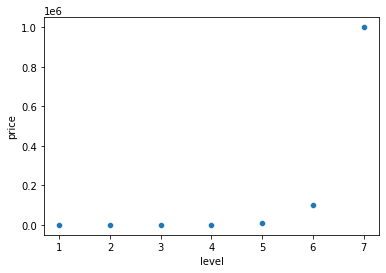

In [47]:
# 생성한 데이터프레임을 scatterplot으로 작성
# 각 시행값이 거듭제곱 단위로 분포하므로, 통계치가 극단적인 값에 편향되어 대표성이 낮음

sns.scatterplot(x = price_df['level'], y = price_df['price'])

<AxesSubplot:xlabel='level', ylabel='price'>

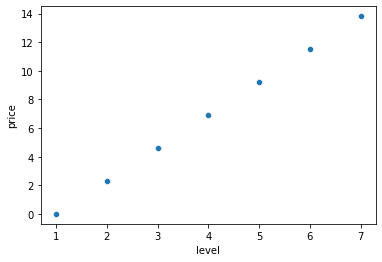

In [48]:
# 각 시행값에 log를 취해 거듭제곱 분포를 확인
# 시행값이 선형적으로 분포하여 이상치의 영향이 축소되며 통계치의 대표성이 높아짐

sns.scatterplot(x = price_df['level'], y = np.log(price_df['price']))

### 4-4-2. 원-핫 인코딩

In [49]:
# 문자열 인코딩을 위해 기존 데이터프레임을 확인함

salary_df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132.00
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.70
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48
...,...,...,...,...,...,...,...,...,...,...
6679,49.0,Female,3,Director of Marketing,20.0,200000,UK,Mixed,0,132.00
6680,32.0,Male,0,Sales Associate,3.0,50000,Australia,Australian,0,135.30
6681,30.0,Female,1,Financial Manager,4.0,55000,China,Chinese,0,100.00
6682,46.0,Male,2,Marketing Manager,14.0,140000,China,Korean,0,100.00


In [50]:
pd.get_dummies(salary_df, columns = ["Gender"], drop_first = True) # n개의 카테고리를 n-1개의 boolean 컬럼으로 표현

,Age,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI,Gender_Male
0,32.0,1,Software Engineer,5.0,90000,UK,White,0,132.00,1
1,28.0,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48,0
2,45.0,3,Manager,15.0,150000,Canada,White,1,158.70,1
3,36.0,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48,0
4,52.0,2,Director,20.0,200000,USA,Asian,0,307.48,1
...,...,...,...,...,...,...,...,...,...,...
6679,49.0,3,Director of Marketing,20.0,200000,UK,Mixed,0,132.00,0
6680,32.0,0,Sales Associate,3.0,50000,Australia,Australian,0,135.30,1
6681,30.0,1,Financial Manager,4.0,55000,China,Chinese,0,100.00,0
6682,46.0,2,Marketing Manager,14.0,140000,China,Korean,0,100.00,1


In [51]:
# One-Hot encoding은 n개의 범주에 대해 n-1개의 컬럼을 새롭게 생성하므로 데이터프레임의 크기가 급격히 커질 수 있다.
# 따라서 새로운 컬럼의 숫자를 최소화하는 방식으로 적용하는 것이 필요하다.

salary_df[['Gender', 'Country', 'Race', 'Job Title']].nunique() # 컬럼별 고유값 확인

Gender         2
Country        5
Race          10
Job Title    129
dtype: int64

In [52]:
salary_df['Job Title'].value_counts().tail(60) # 빈도수 낮은 값 확인

Director of Finance                 2
Manager                             2
Event Coordinator                   2
Engineer                            2
Administrative Assistant            2
Copywriter                          2
Customer Service Manager            2
Director of Human Capital           1
IT Project Manager                  1
Social Media Man                    1
Quality Assurance Analyst           1
Director of Sales and Marketing     1
Account Executive                   1
Director of Business Development    1
Human Resources Specialist          1
VP of Operations                    1
Advertising Coordinator             1
Data Entry Clerk                    1
Director                            1
Product Development Manager         1
Software Architect                  1
HR Specialist                       1
Customer Service Rep                1
Software Manager                    1
IT Support                          1
VP of Finance                       1
Customer Sup

In [53]:
# 정리되지 않은 값이 많아 전처리가 필요함
# 전처리된 데이터 호출

job = pd.read_csv('~/data/job.csv')
salary_df = salary_df.merge(job, on = "Job Title", how = 'left') # 전처리된 데이터 머지
salary_df.drop("Job Title", axis = 1, inplace = True) # 기존 데이터 드랍
salary_df # 확인

,Age,Gender,Education Level,Years of Experience,Salary,Country,Race,Senior,CPI,Jobs
0,32.0,Male,1,5.0,90000,UK,White,0,132.00,Software
1,28.0,Female,2,3.0,65000,USA,Hispanic,0,307.48,Data Analyst
2,45.0,Male,3,15.0,150000,Canada,White,1,158.70,Manager
3,36.0,Female,1,7.0,60000,USA,Hispanic,0,307.48,Sales
4,52.0,Male,2,20.0,200000,USA,Asian,0,307.48,Director
...,...,...,...,...,...,...,...,...,...,...
6669,49.0,Female,3,20.0,200000,UK,Mixed,0,132.00,Marketing
6670,32.0,Male,0,3.0,50000,Australia,Australian,0,135.30,Sales
6671,30.0,Female,1,4.0,55000,China,Chinese,0,100.00,Financial
6672,46.0,Male,2,14.0,140000,China,Korean,0,100.00,Marketing


In [55]:
salary_df['Jobs'].nunique() # 전처리된 데이터의 빈도수 낮은 값 확인

60

In [56]:
salary_df['Jobs'].value_counts() # 전처리 여지가 남아있는지 확인

Software                        2156
Marketing                        999
Data Scientist                   572
Sales                            453
HR                               420
Data Analyst                     389
Product Manager                  325
Project Engineer                 316
Financial                        200
Research                         195
Operations                       147
Web Developer                    129
Product Designer                  80
Receptionist                      57
Project Manager                   36
Business Analyst                  23
Graphic Designer                  23
Social Media                      18
Customer Service                  11
Business Development               7
UX                                 6
Accountant                         6
Business Development Manager       5
Account                            5
Delivery Driver                    5
Project Coordinator                4
Scientist                          4
R

In [59]:
# 전처리 가능한 데이터가 아직 보이지만, 실습을 위해 One-Hot 인코딩 진행

salary_df = pd.get_dummies(salary_df, columns = ['Gender', 'Country', 'Race', 'Jobs'], drop_first = True)
salary_df # 데이터 확인

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,...,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
0,32.0,1,5.0,90000,0,132.00,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,28.0,2,3.0,65000,0,307.48,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45.0,3,15.0,150000,1,158.70,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36.0,1,7.0,60000,0,307.48,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52.0,2,20.0,200000,0,307.48,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6669,49.0,3,20.0,200000,0,132.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6670,32.0,0,3.0,50000,0,135.30,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6671,30.0,1,4.0,55000,0,100.00,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6672,46.0,2,14.0,140000,0,100.00,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


---
## 4-5. 스케일링
- 주요 스케일링 방법과 장단점

| 방법론 | 계산방식 | 적합한 상황 또는 특징 |
| :---: | :---: | :---: |
| 정규화 | $$ 시행값 - 평균 \over 표준편차 $$ | 모집단이 정규분포를 따를 때, 시행값이 각자 독립시행일 때 적합하며, 그렇지 않다면 의미가 퇴색됨<br>이상치가 많다면 모집단이 정규분포를 따르지 않는다는 강한 단서가 될 수 있으므로 사용하지 않는 것이 좋음 |
| 로버스트 | $$ 시행값 - 중앙값 \over IQR $$ | 모집단이 정규분포를 따르지 않거나 이상치의 영향이 지나치게 클 때 적합함 |
| 표준화(Min-Max) | $$ 시행값 - 최소값 \over 최대값 - 최소값 $$ | 표본집단의 분포를 그대로 유지하며 범위를 제한하려 할 때, 딥러닝 등에 유용함 |

---

In [60]:
# 스케일링 관련 모듈 임포트

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
ss = StandardScaler()
rs = RobustScaler()
mm = MinMaxScaler()

In [61]:
ss.fit(salary_df) # 스케일러를 학습시킴: 평균, 표준편차 등을 준비
ss.transform(salary_df) # 스케일러를 작동시킴: 데이터프레임을 스케일링

array([[-0.2123872 , -0.70663318, -0.51025684, ..., -0.029997  ,
        -0.01224164, -0.14039125],
       [-0.7391327 ,  0.42922179, -0.84197037, ..., -0.029997  ,
        -0.01224164, -0.14039125],
       [ 1.49953568,  1.56507675,  1.14831086, ..., -0.029997  ,
        -0.01224164, -0.14039125],
       ...,
       [-0.47575995, -0.70663318, -0.6761136 , ..., -0.029997  ,
        -0.01224164, -0.14039125],
       [ 1.63122206,  0.42922179,  0.98245409, ..., -0.029997  ,
        -0.01224164, -0.14039125],
       [-1.00250545, -1.84248814, -1.17368391, ..., -0.029997  ,
        -0.01224164, -0.14039125]])

- .fit()과 .transform() 함수가 나뉘어져 있는 이유:
 - 모집단을 추정하기 위한 표본집단과 추정된 모집단을 활용해 예측하는 표본집단은 다를 수 있음
 - 과거 10년간의 데이터를 활용하여 모집단을 추정하여 확정한 모델을 활용해 1일치의 데이터를 분석하려 할 경우, 10년 1일치의 데이터로 모집단을 재추정하는 것은 비효율적이며, 1일치의 데이터에 매일 통계적 전처리를 하는 것도 무의미함
 - 따라서 모집단 추정과 모델 적용을 분리하는 것이 합리적임

In [64]:
# NumPy ndArray 형태로 반환된 값을 Pandas DataFrame 형태로 변환하여 저장

ss_df = pd.DataFrame(ss.transform(salary_df), columns = salary_df.columns)

In [65]:
# 같은 방식으로 robust scaling을 진행

rs.fit(salary_df)
rs_df = pd.DataFrame(rs.transform(salary_df), columns = salary_df.columns)

In [67]:
# 같은 방식으로 mM scaling을 진행

mm.fit(salary_df)
mm_df = pd.DataFrame(mm.transform(salary_df), columns = salary_df.columns)

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,...,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
0,0.268293,0.333333,0.147059,0.359103,0.0,0.154232,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.170732,0.666667,0.088235,0.258963,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.585366,1.000000,0.441176,0.599439,1.0,0.282919,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.365854,0.333333,0.205882,0.238935,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.756098,0.666667,0.588235,0.799720,0.0,1.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6669,0.682927,1.000000,0.588235,0.799720,0.0,0.154232,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6670,0.268293,0.000000,0.088235,0.198878,0.0,0.170137,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6671,0.219512,0.333333,0.117647,0.218906,0.0,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6672,0.609756,0.666667,0.411765,0.559383,0.0,0.000000,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
ss_df.describe() # 표준화 스케일링 통계치 확인

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,...,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
count,6.674000e+03,6.674000e+03,6674.000000,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,...,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03
mean,3.406858e-17,1.277572e-16,0.000000,1.022057e-16,1.022057e-16,-2.571113e-16,-1.192400e-16,-7.186340e-17,-3.619786e-17,-6.427782e-17,...,3.406858e-17,-3.406858e-17,-2.129286e-18,-1.064643e-18,4.258572e-18,-2.129286e-18,-2.129286e-18,-4.258572e-18,-2.129286e-18,-4.258572e-17
std,1.000075e+00,1.000075e+00,1.000075,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,...,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00
min,-1.660937e+00,-1.842488e+00,-1.339541,-2.176344e+00,-4.086407e-01,-9.170975e-01,-1.103970e+00,-4.967671e-01,-5.002809e-01,-4.988760e-01,...,-5.200314e-02,-6.907983e-01,-1.224164e-02,-1.224164e-02,-2.120631e-02,-1.224164e-02,-1.731358e-02,-2.999700e-02,-1.224164e-02,-1.403912e-01
25%,-7.391327e-01,-7.066332e-01,-0.841970,-8.575989e-01,-4.086407e-01,-4.801554e-01,-1.103970e+00,-4.967671e-01,-5.002809e-01,-4.988760e-01,...,-5.200314e-02,-6.907983e-01,-1.224164e-02,-1.224164e-02,-2.120631e-02,-1.224164e-02,-1.731358e-02,-2.999700e-02,-1.224164e-02,-1.403912e-01
50%,-2.123872e-01,-7.066332e-01,-0.178543,-5.574179e-03,-4.086407e-01,-4.350957e-01,9.058216e-01,-4.967671e-01,-5.002809e-01,-4.988760e-01,...,-5.200314e-02,-6.907983e-01,-1.224164e-02,-1.224164e-02,-2.120631e-02,-1.224164e-02,-1.731358e-02,-2.999700e-02,-1.224164e-02,-1.403912e-01
75%,5.777311e-01,4.292218e-01,0.650741,8.464505e-01,-4.086407e-01,-1.155818e-01,9.058216e-01,-4.967671e-01,-5.002809e-01,-4.988760e-01,...,-5.200314e-02,1.447601e+00,-1.224164e-02,-1.224164e-02,-2.120631e-02,-1.224164e-02,-1.731358e-02,-2.999700e-02,-1.224164e-02,-1.403912e-01
max,3.738204e+00,1.565077e+00,4.299589,2.550500e+00,2.447137e+00,1.915926e+00,9.058216e-01,2.013016e+00,1.998877e+00,2.004506e+00,...,1.922961e+01,1.447601e+00,8.168843e+01,8.168843e+01,4.715577e+01,8.168843e+01,5.775812e+01,3.333667e+01,8.168843e+01,7.122951e+00


In [69]:
rs_df.describe() # 로버스트 스케일링 통계치 확인

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,...,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
count,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,...,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.00000,6674.000000,6674.000000,6674.000000
mean,0.161283,0.622116,0.119610,0.003271,0.143093,1.193437,-0.450704,0.197932,0.200180,0.199281,...,0.002697,0.323045,0.000150,0.000150,0.000450,0.000150,0.00030,0.000899,0.000150,0.019329
std,0.759437,0.880460,0.669972,0.586881,0.350193,2.743136,0.497601,0.398471,0.400165,0.399490,...,0.051867,0.467675,0.012241,0.012241,0.021198,0.012241,0.01731,0.029972,0.012241,0.137688
min,-1.100000,-1.000000,-0.777778,-1.273889,0.000000,-1.322097,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,-0.400000,0.000000,-0.444444,-0.500000,0.000000,-0.123596,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.600000,1.000000,0.555556,0.500000,0.000000,0.876404,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,3.000000,2.000000,3.000000,1.500000,1.000000,6.448689,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [70]:
mm_df.describe() # mM 스케일링 통계치 확인

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,...,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
count,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,...,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.00000,6674.000000,6674.000000,6674.000000
mean,0.307630,0.540705,0.237544,0.460422,0.143093,0.323717,0.549296,0.197932,0.200180,0.199281,...,0.002697,0.323045,0.000150,0.000150,0.000450,0.000150,0.00030,0.000899,0.000150,0.019329
std,0.185229,0.293487,0.177346,0.211574,0.350193,0.353006,0.497601,0.398471,0.400165,0.399490,...,0.051867,0.467675,0.012241,0.012241,0.021198,0.012241,0.01731,0.029972,0.012241,0.137688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.170732,0.333333,0.088235,0.278991,0.000000,0.154232,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.268293,0.333333,0.205882,0.459243,0.000000,0.170137,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.414634,0.666667,0.352941,0.639495,0.000000,0.282919,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
